In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [81]:
data = pd.read_csv("data\\bank-full.csv")

In [225]:
data_dummies = pd.get_dummies(data)

In [226]:
data_dummies = data_dummies.drop(["y_no","duration","housing_no"],axis=1)

In [189]:
data_dummies.columns

Index([u'age', u'balance', u'day', u'campaign', u'pdays', u'previous',
       u'job_admin.', u'job_blue-collar', u'job_entrepreneur',
       u'job_housemaid', u'job_management', u'job_retired',
       u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'education_primary', u'education_secondary', u'education_tertiary',
       u'education_unknown', u'default_no', u'default_yes', u'housing_yes',
       u'loan_no', u'loan_yes', u'contact_cellular', u'contact_telephone',
       u'contact_unknown', u'month_apr', u'month_aug', u'month_dec',
       u'month_feb', u'month_jan', u'month_jul', u'month_jun', u'month_mar',
       u'month_may', u'month_nov', u'month_oct', u'month_sep',
       u'poutcome_failure', u'poutcome_other', u'poutcome_success',
       u'poutcome_unknown', u'y_yes', u'Probability'],
      dtype='object')

In [ ]:
data_dummies[[""]]

In [157]:
X = data_dummies.drop("y_yes",axis=1).as_matrix()
Y = data_dummies[["y_yes"]].as_matrix()

In [198]:
reg = LogisticRegression()
X = preprocessing.scale(X)
Y = preprocessing.scale(Y)
X_train, X_test, y_train, y_test = train_test_split(X,\
                                                    Y,\
                                                    test_size=0.33,\
                                                    random_state=42)

reg.fit(X_train,y_train)
test_probs = []
for i in reg.predict_proba(X):
    test_probs.append(1.0-i[0])

ValueError: Unknown label type: array([-0.36398261, -0.36398261, -0.36398261, ..., -0.36398261,
       -0.36398261, -0.36398261])

In [192]:
coef_df = pd.DafaFrame()
reg.coef_.tolist()[0]

[0.0019796832204002275,
 1.6331517895028596e-05,
 0.004382493622187799,
 -0.08539784452524131,
 0.00014823743005697176,
 0.02233843061868364,
 -0.044284726431082756,
 -0.11234766842591276,
 -0.16649963413818925,
 -0.22971891420108706,
 -0.08935329220187749,
 0.33596930009516546,
 -0.11437909887745475,
 -0.07544853904959371,
 0.2577546413863375,
 -0.11435213788429056,
 0.1366417939150967,
 -0.21430760502904247,
 -0.11857640910357259,
 -0.3165750874458247,
 0.004825615707478264,
 -0.28615359683384944,
 -0.10377439829758697,
 0.0748407399694738,
 -0.11523862567986093,
 -0.18508030769970873,
 -0.24524557314247825,
 -0.5660556344454373,
 -0.023239784638247617,
 -0.4070860962040457,
 0.3600969110352704,
 0.18813141942839448,
 -0.9785542113055415,
 0.15323539352536988,
 -0.7433288014457446,
 0.5145085051233624,
 -0.34114951608536226,
 -1.052866454227514,
 -0.6263172721194297,
 0.16963704733219762,
 1.1148317452009693,
 -0.39820893443064487,
 -0.766223058041132,
 0.7770905744887331,
 0.7684648

In [162]:
data_dummies4 = data_dummies
data_dummies4["Probability"] = test_probs

In [165]:
data_dummies4 = data_dummies4.sort("Probability",ascending=False)

In [146]:
high_cov = {}
high_p = {}
already_done = []
all_high_p_cols = []

from sklearn.feature_selection import f_regression



for first_col in data_dummies:
    already_done.append(first_col)
    for second_col in data_dummies:
        if second_col not in already_done:
            X1 = data_dummies[[first_col]].as_matrix()
            Y1 = data_dummies[[second_col]].as_matrix()
            X = preprocessing.scale(X1)
            Y = preprocessing.scale(Y1)
            reg = linear_model.LinearRegression()
            reg.fit(X,Y)
            beta = reg.coef_
            sec1 = second_col.split("_")[0]
            first1 = first_col.split("_")[0]
            
            p_val = f_regression(data_dummies[[first_col]].as_matrix(),data_dummies[[second_col]].as_matrix())[1].tolist()[0]
            
            if (np.abs(p_val) > 0.05) and (sec1 != first1) and first_col != "y_yes" and second_col != "y_yes":
                st = str(first_col) + "_vs_" + str(second_col)
                high_cov[st]=beta
                all_high_p_cols.append(first_col)
                all_high_p_cols.append(second_col)
                high_p[st] = p_val

In [151]:
pd.Series(all_high_p_cols).drop_duplicates().reset_index().drop("index",axis=1)

,0
0,age
1,day
2,campaign
3,previous
4,job_self-employed
5,job_unemployed
6,month_feb
7,month_jan
8,month_jul
9,poutcome_failure


In [ ]:
data_dummies[[""]]

In [134]:
key_list = []
cov_list = []
p_list = []
for key in high_cov:
    key_list.append(key)
    cov_list.append(high_cov[key][0][0])
    p_list.append(high_p[key])

In [135]:
p_df = pd.DataFrame(key_list)
p_df["p value"] = p_list
p_df.columns = ["key","p value"]

In [156]:
print len(p_df) , "column combinations with p-value > 0.05"
p_df.sort("p value",ascending=False).reset_index().drop("index",axis=1)

236 column combinations with p-value > 0.05


,key,p value
0,job_entrepreneur_vs_month_feb,0.988694
1,job_services_vs_default_yes,0.988522
2,job_services_vs_default_no,0.988522
3,job_unknown_vs_month_mar,0.982205
4,job_housemaid_vs_month_mar,0.981415
5,day_vs_education_unknown,0.980736
6,month_may_vs_poutcome_unknown,0.970395
7,job_self-employed_vs_marital_single,0.968588
8,job_management_vs_month_feb,0.967112
9,job_self-employed_vs_month_oct,0.963680


In [87]:
cov_df["correlation"]=key_list
cov_df["covariance"]=cov_list

In [93]:
cov_df

,correlation,covariance
0,job_blue-collar_vs_education_primary,0.342688
1,previous_vs_poutcome_failure,0.350627
2,contact_unknown_vs_month_may,0.425700
3,previous_vs_poutcome_other,0.306615
4,pdays_vs_poutcome_other,0.389791
5,housing_yes_vs_month_aug,-0.305641
6,contact_unknown_vs_month_jun,0.453077
7,previous_vs_poutcome_unknown,-0.532763
8,job_blue-collar_vs_education_tertiary,-0.320541
9,age_vs_job_retired,0.447378


In [110]:
arr = []
m = 0
for i in range(30):
    m = m+0.1
    arr.append(m)

In [111]:
arr

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999,
 0.9999999999999999,
 1.0999999999999999,
 1.2,
 1.3,
 1.4000000000000001,
 1.5000000000000002,
 1.6000000000000003,
 1.7000000000000004,
 1.8000000000000005,
 1.9000000000000006,
 2.0000000000000004,
 2.1000000000000005,
 2.2000000000000006,
 2.3000000000000007,
 2.400000000000001,
 2.500000000000001,
 2.600000000000001,
 2.700000000000001,
 2.800000000000001,
 2.9000000000000012,
 3.0000000000000013]

In [122]:
from sklearn.feature_selection import f_regression

f_regression(data_dummies[["housing_yes"]].as_matrix(),data_dummies[["month_aug"]].as_matrix())[1].tolist()[0]

#data_dummies[["housing_yes","month_aug"]].plot(x="housing_yes",y="month_aug",kind="scatter")

0.0

In [11]:
key_list2 = []
for i in key_list:
    key_list2 = key_list2 + i.split("_vs_")

In [12]:
correlation_with_y = {}
cor_w_y_arr = []
cols = []
Y = data_dummies[["y_yes"]].as_matrix()
for col in key_list2:
    cols.append(col)
    X = data_dummies[[col]].as_matrix()
    X = preprocessing.scale(X)
    reg = linear_model.LinearRegression()
    reg.fit(X,Y)
    beta = reg.coef_
    cor_w_y_arr.append(beta[0][0])
    correlation_with_y[col] = beta[0][0]

In [13]:
cov_dfY = pd.DataFrame()
cov_dfY["Variables"] = cols
cov_dfY["WithY"]=cor_w_y_arr

In [14]:
cov_dfY

,Variables,WithY
0,job_blue-collar,-0.023168
1,education_primary,-0.012983
2,previous,0.029966
3,poutcome_failure,0.003177
4,contact_unknown,-0.048511
5,month_may,-0.032944
6,previous,0.029966
7,poutcome_other,0.010270
8,pdays,0.033304
9,poutcome_other,0.010270


In [15]:
cov_dfY.T[li].T["Variables"]

NameError: name 'li' is not defined

In [17]:
cov_dfY["WithY"].as_matrix()
lag_list = [0]
for i in cov_dfY["WithY"].as_matrix():
    lag_list.append(i)
greater_df = pd.DataFrame()
greater_df["unlagged"] = cov_dfY["WithY"]
greater_df["unlagged"] = greater_df.apply(lambda row: np.abs(row["unlagged"]),axis=1)
greater_df["lagged"] = pd.Series(lag_list)[:-1]
greater_df["lagged"] = greater_df.apply(lambda row: np.abs(row["lagged"]),axis=1)
    
    

In [18]:
greater_df["difference"]=greater_df.apply(lambda row: row["unlagged"]-row["lagged"],axis=1)

In [19]:
li = [i*2 for i in range(len(greater_df)/2)]

In [20]:
transformed = greater_df.T

In [21]:
variable_rel_imp = transformed[li].T

In [22]:
cov_dfY.T[li].T["Variables"]

0      job_blue-collar
2             previous
4      contact_unknown
6             previous
8                pdays
10         housing_yes
12     contact_unknown
14            previous
16     job_blue-collar
18                 age
20               pdays
22         housing_yes
24      job_management
26                 age
28               pdays
30    contact_cellular
32      job_management
34               pdays
36    contact_cellular
Name: Variables, dtype: object

In [23]:
variable_rel_imp["var"]=cov_dfY.T[li].T["Variables"]

In [24]:
variable_rel_imp["choose"] = variable_rel_imp.apply(lambda row: 1 if row["difference"]>0 else 0,axis=1)

In [25]:
variable_rel_imp

,unlagged,lagged,difference,var,choose
0,0.023168,0.000000,0.023168,job_blue-collar,1
2,0.029966,0.012983,0.016984,previous,1
4,0.048511,0.003177,0.045334,contact_unknown,1
6,0.029966,0.032944,-0.002978,previous,0
8,0.033304,0.010270,0.023034,pdays,1
10,0.044730,0.010270,0.034460,housing_yes,1
12,0.048511,0.002744,0.045767,contact_unknown,1
14,0.029966,0.005401,0.024565,previous,1
16,0.023168,0.053690,-0.030523,job_blue-collar,0
18,0.008085,0.021357,-0.013272,age,0


In [26]:
drop_cols = variable_rel_imp[variable_rel_imp["choose"]==0]["var"].as_matrix()

In [27]:
data_dummies2 = data_dummies.drop(drop_cols,axis=1)

In [28]:
data_dummies2.columns

Index([u'balance', u'day', u'campaign', u'pdays', u'job_admin.',
       u'job_entrepreneur', u'job_housemaid', u'job_retired',
       u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'education_primary', u'education_secondary', u'education_tertiary',
       u'education_unknown', u'default_no', u'default_yes', u'loan_no',
       u'loan_yes', u'contact_cellular', u'contact_telephone',
       u'contact_unknown', u'month_apr', u'month_aug', u'month_dec',
       u'month_feb', u'month_jan', u'month_jul', u'month_jun', u'month_mar',
       u'month_may', u'month_nov', u'month_oct', u'month_sep',
       u'poutcome_failure', u'poutcome_other', u'poutcome_success',
       u'poutcome_unknown', u'y_yes'],
      dtype='object')

In [228]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
X = data_dummies.drop(["y_yes"],axis=1).as_matrix()
X = preprocessing.scale(X)
Y = data_dummies[["y_yes"]].as_matrix()
reg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [229]:
j = []
for i in reg.coef_[0]:
    j.append(i)

In [230]:
data_dummies.columns

Index([u'age', u'balance', u'day', u'campaign', u'pdays', u'previous',
       u'job_admin.', u'job_blue-collar', u'job_entrepreneur',
       u'job_housemaid', u'job_management', u'job_retired',
       u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'education_primary', u'education_secondary', u'education_tertiary',
       u'education_unknown', u'default_no', u'default_yes', u'housing_yes',
       u'loan_no', u'loan_yes', u'contact_cellular', u'contact_telephone',
       u'contact_unknown', u'month_apr', u'month_aug', u'month_dec',
       u'month_feb', u'month_jan', u'month_jul', u'month_jun', u'month_mar',
       u'month_may', u'month_nov', u'month_oct', u'month_sep',
       u'poutcome_failure', u'poutcome_other', u'poutcome_success',
       u'poutcome_unknown', u'y_yes'],
      dtype='object')

In [231]:
columns_beta = pd.DataFrame()
columns_beta["Cols"] = data_dummies.columns[:-1]
columns_beta["Betas"] = j

In [232]:
columns_beta["Abs_Beta"] = columns_beta.apply(lambda row: np.abs(row["Betas"]),axis=1)

In [214]:
columns_beta

,Cols,Betas,Abs_Beta
0,age,0.017407,0.017407
1,balance,0.051405,0.051405
2,day,0.030774,0.030774
3,campaign,-0.268597,0.268597
4,pdays,-0.005002,0.005002
5,previous,0.023656,0.023656
6,job_admin.,0.011586,0.011586
7,job_blue-collar,-0.032134,0.032134
8,job_entrepreneur,-0.027155,0.027155
9,job_housemaid,-0.042834,0.042834


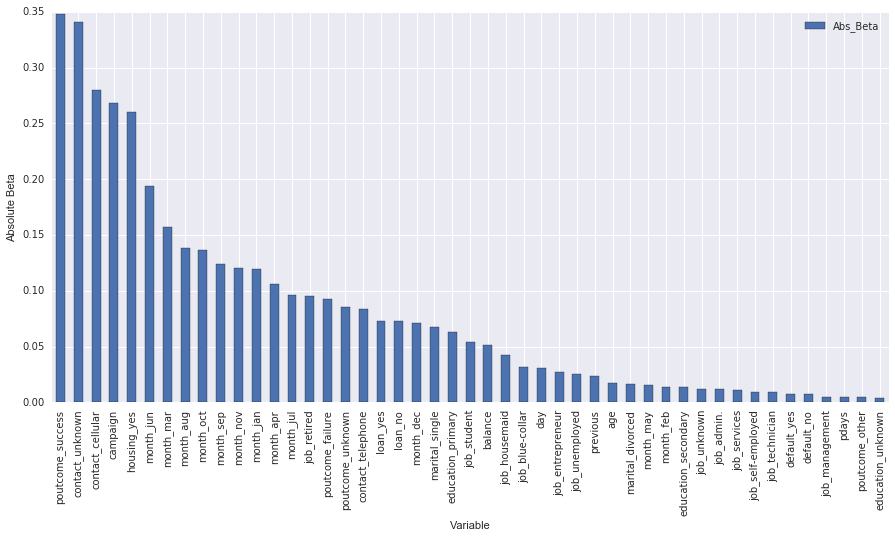

In [233]:
columns_beta.drop([19,23]).sort("Abs_Beta",ascending=False).plot(x="Cols",y="Abs_Beta",figsize=(15,7),kind="bar")
plt.xlabel("Variable")
plt.ylabel("Absolute Beta")

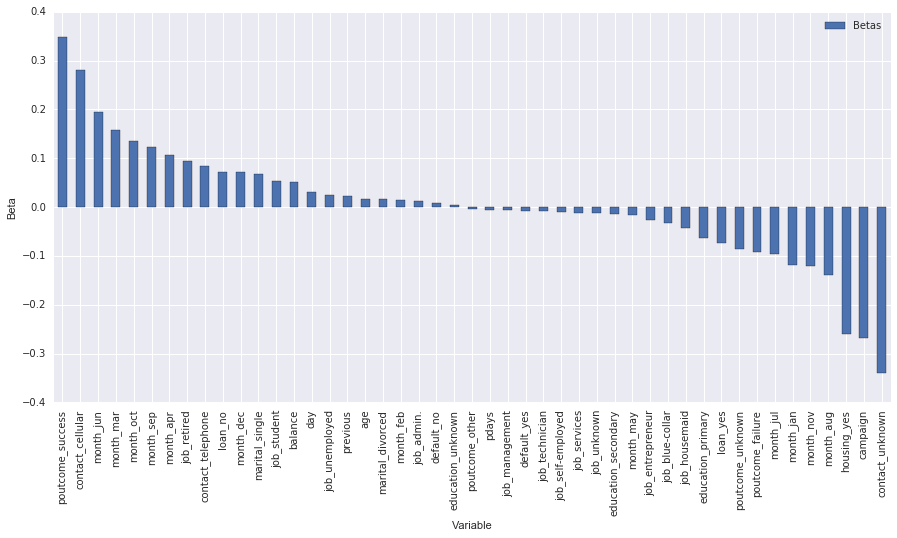

In [234]:
columns_beta.drop([19,23]).sort("Betas",ascending=False).plot(x="Cols",y="Betas",figsize=(15,7),kind="bar")
plt.xlabel("Variable")
plt.ylabel("Beta")

In [36]:
from sklearn.cross_validation import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [38]:
from sklearn.metrics import confusion_matrix

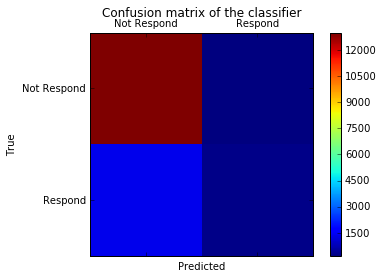

[[12995   180]
 [ 1430   315]]


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
X = data_dummies2.drop("y_yes",axis=1).as_matrix()
X = preprocessing.scale(X)
Y = data_dummies2[["y_yes"]].as_matrix()
reg.fit(X,Y)

reg = LogisticRegression(class_weight={0:1,1:1})
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

cm = confusion_matrix(y_test,predictions)
labels = ['Not Respond', 'Respond']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print cm

In [40]:
cm = confusion_matrix(y_test,predictions)

In [41]:
test_probs = []
for i in reg.predict_proba(X):
    test_probs.append(1.0-i[0])

In [42]:
for i in data_dummies2.columns:
    print i

balance
day
campaign
pdays
job_admin.
job_entrepreneur
job_housemaid
job_retired
job_self-employed
job_services
job_student
job_technician
job_unemployed
job_unknown
marital_divorced
marital_married
marital_single
education_primary
education_secondary
education_tertiary
education_unknown
default_no
default_yes
loan_no
loan_yes
contact_cellular
contact_telephone
contact_unknown
month_apr
month_aug
month_dec
month_feb
month_jan
month_jul
month_jun
month_mar
month_may
month_nov
month_oct
month_sep
poutcome_failure
poutcome_other
poutcome_success
poutcome_unknown
y_yes


In [43]:
data_dummies2["Probability"]=test_probs

In [44]:
data["Probability"]=test_probs

In [45]:
data.drop("duration")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Probability
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.030551
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.032768
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.015344
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.025808
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.030272
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0.029502
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0.027638
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,0.032095
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0.037367
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0.033106


In [46]:
data_sort = data.sort("Probability",ascending=False)

In [47]:
arr = [(j+1)*0.1 for j in range(9)]

In [48]:
arr

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [49]:

for i in arr:
    respondants =  sum((data_sort[data_sort["Probability"]>i]["y"]=="yes")*1)
    perc_respondants = float(respondants)/float(len(data_sort[data_sort["Probability"]>i]))
    print perc_respondants

0.217515942199
0.447389720761
0.537176547658
0.583629893238
0.645051194539
0.691885964912
0.735244519393
0.763231197772
0.764705882353


In [50]:
respondants =  sum((data_sort[data_sort["Probability"]>0]["y"]=="yes")*1)
perc_respondants = float(respondants)/float(len(data_sort[data_sort["Probability"]>0]))
print perc_respondants

0.116984804583


In [167]:
arr = [int(round((j)*4521.1)) for j in range(10)]

In [175]:
correct = []
for i in arr:
    num_correct = sum((data_sort[i:(i+4521)]["y"]=="yes")*1)
    correct.append(num_correct)

In [173]:
correct_non_trans = []
for i in arr:
    num_correct = sum((data_dummies4[i:(i+4521)]["y_yes"]==1)*1)
    correct_non_trans.append(num_correct)

In [174]:
correct_non_trans

[2187, 768, 486, 429, 366, 250, 279, 223, 175, 126]

In [180]:
correct_non_trans2 = [0,correct_non_trans[0]]
for i in range(len(correct)-1):
    correct_non_trans2.append(correct2[i] + correct_non_trans[i+1])

In [181]:
correct_non_trans2

[0, 2187, 2857, 3354, 3837, 4170, 4442, 4773, 4995, 5164, 5301]

In [188]:
correct3

[0, 2089, 2868, 3408, 3804, 4192, 4494, 4772, 4989, 5175, 5289]

In [182]:
lift_df_non = pd.DataFrame()
lift_df_non["Model"] = correct_non_trans2
lift_df_non["Straight Line"] = straight_line

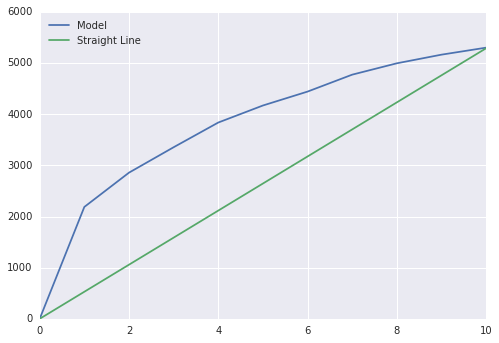

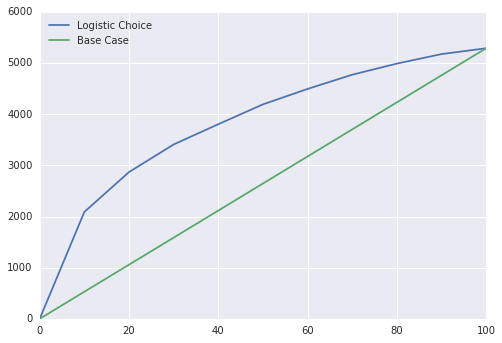

In [187]:
lift_df_non.plot()
plt.show()

Lift_df[["Logistic Choice","Base Case"]].plot()
plt.show()

In [195]:
lift_df_non.coef_

AttributeError: 'DataFrame' object has no attribute 'coef_'

In [53]:
correct2 = [correct[0]]
for i in range(len(correct)-1):
    correct2.append(correct2[i] + correct[i+1])
    

In [54]:
arr.append(40690+4521)

In [55]:
success_fracs = []
for i in range(len(arr[1:])):
    success_fracs.append(float(correct2[i])/float(arr[1:][i]))

In [56]:
correct3 = [0]
straight_line = [0]
k = 0
for i in correct2:
    correct3.append(i)
    k = k + 4521*0.11698480458295547
    straight_line.append(k)

In [57]:
t = []
for i in range(11):
    t.append(i*10)
print t

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [58]:
num_considered = []
L = 0
for i in range(11):
    num_considered.append(L)
    L = L + 4521


In [59]:
Lift_df = pd.DataFrame(correct3)
Lift_df.columns = ["Logistic Choice"]
Lift_df["Base Case"] = straight_line
Lift_df["num_considered"] = num_considered
Lift_df.index = t


In [60]:
Lift_df["Logistic Percent Correct"] = Lift_df.apply(lambda row: row["num_considered"] if row["num_considered"] == 0 else float(row["Logistic Choice"])/float(row["num_considered"]), axis = 1)
Lift_df["Base Percent Correct"] = Lift_df.apply(lambda row: row["num_considered"] if row["num_considered"] == 0 else float(row["Base Case"])/float(row["num_considered"]), axis = 1)

In [61]:
Lift_df2 = Lift_df.drop(0)

In [62]:
ytick = [0]
for i in range(50):
    j = i+1
    if j%5==0:
        ytick.append(round(j*0.01,2))
        

In [63]:
correct_individ_perc = []
for i in correct:
    correct_individ_perc.append(float(i)/4521.0)

In [64]:
correct_individ_perc

[0.46206591462065916,
 0.1723070117230701,
 0.11944260119442601,
 0.08759124087591241,
 0.08582172085821721,
 0.0667993806679938,
 0.06149082061490821,
 0.04799823047998231,
 0.0411413404114134,
 0.025215660252156602]

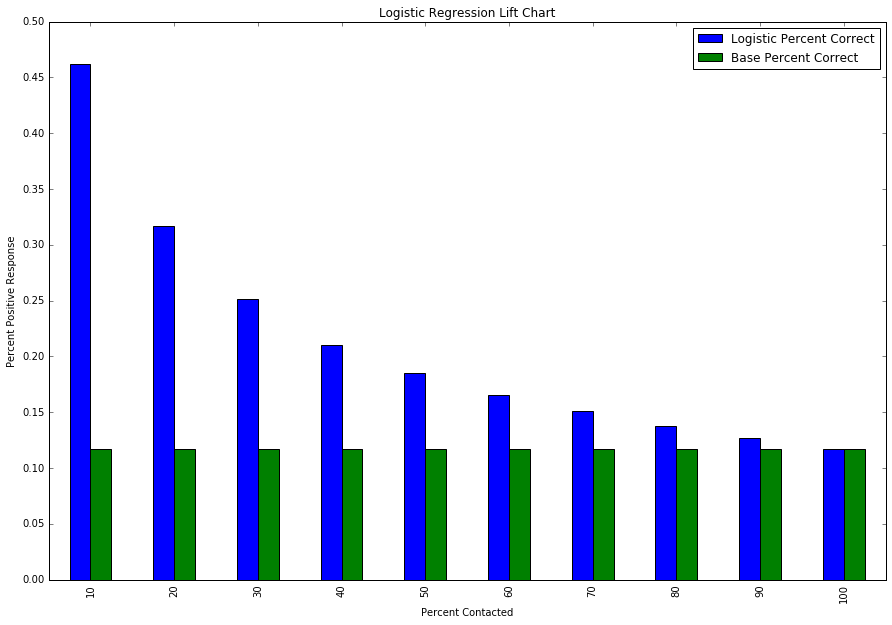

In [65]:
Lift_df2[["Logistic Percent Correct", "Base Percent Correct"]].plot(figsize=(15,10),xticks=t[1:],yticks=ytick,kind="bar")
plt.xlabel("Percent Contacted")
plt.ylabel("Percent Positive Response")
plt.title("Logistic Regression Lift Chart")

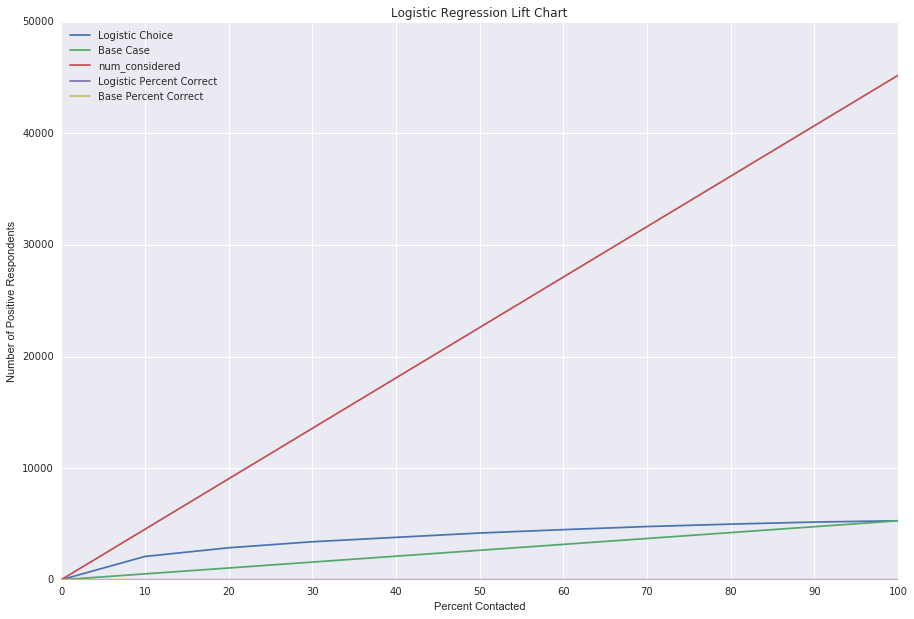

In [66]:
import seaborn as sns
Lift_df.plot(figsize=(15,10),xticks=t)
plt.xlabel("Percent Contacted")
plt.ylabel("Number of Positive Respondents")
plt.title("Logistic Regression Lift Chart")

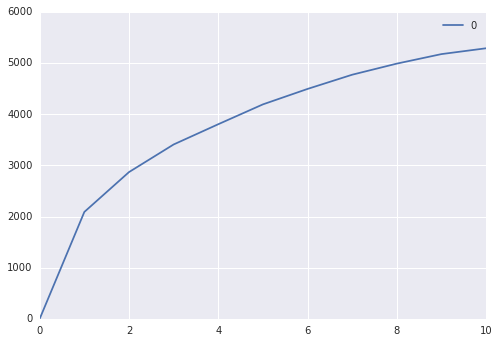

In [67]:
lift_plot = pd.DataFrame(correct3).plot()

In [68]:
ed_prim = data_dummies[data_dummies['education_primary']==1].drop(['education_primary','education_secondary','education_tertiary'],axis=1)
ed_sec = data_dummies[data_dummies['education_secondary']==1].drop(['education_primary','education_secondary','education_tertiary'],axis=1)
ed_tert = data_dummies[data_dummies['education_tertiary']==1].drop(['education_primary','education_secondary','education_tertiary'],axis=1)

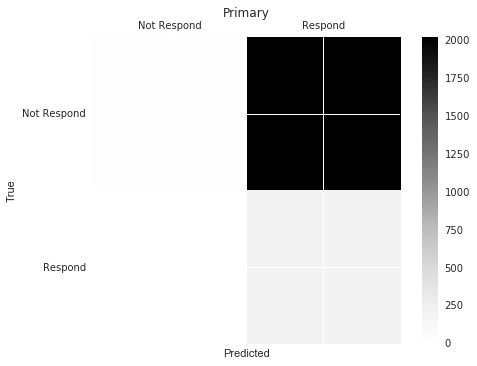

[[  34 2022]
 [   0  205]]


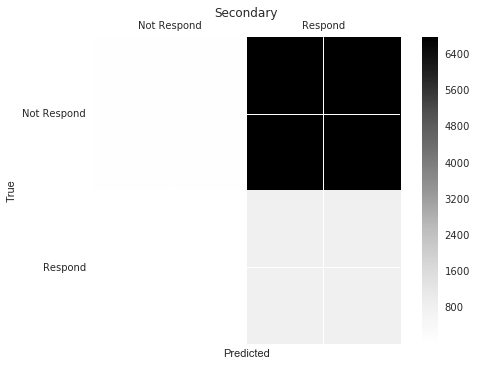

[[  49 6789]
 [   1  818]]


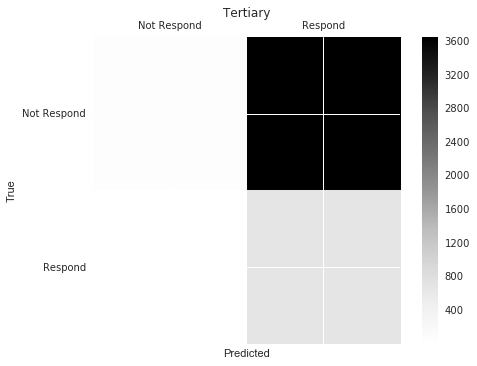

[[  68 3652]
 [   1  669]]


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

X = ed_prim.drop("y_yes",axis=1).as_matrix()
X = preprocessing.scale(X)
Y = ed_prim[["y_yes"]].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

reg = LogisticRegression(class_weight={0:1,1:55})
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

cm = confusion_matrix(y_test,predictions)
labels = ['Not Respond', 'Respond']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Primary")
plt.show()
print cm

X = ed_sec.drop("y_yes",axis=1).as_matrix()
X = preprocessing.scale(X)
Y = ed_sec[["y_yes"]].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

reg = LogisticRegression(class_weight={0:1,1:62})
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

cm = confusion_matrix(y_test,predictions)
labels = ['Not Respond', 'Respond']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Secondary")
plt.show()
print cm

X = ed_tert.drop("y_yes",axis=1).as_matrix()
X = preprocessing.scale(X)
Y = ed_tert[["y_yes"]].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

reg = LogisticRegression(class_weight={0:1,1:62})
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

cm = confusion_matrix(y_test,predictions)
labels = ['Not Respond', 'Respond']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Tertiary")
plt.show()
print cm

In [70]:
329.0/(1416.0+329.0)

0.18853868194842408

In [71]:
drop_cols2 = []
for i in drop_cols:
    drop_cols2.append(i)

In [72]:
for i in ["previous", "pdays", "age", "job_management"]:
    drop_cols2.append(i)

In [73]:
drops = pd.DataFrame()
drops["To Drop"]=drop_cols2

In [74]:
drop_cols = drops["To Drop"].as_matrix()

In [75]:
data2 = data_dummies.drop(drop_cols,axis=1)

In [76]:

Y = data2["y_yes"].as_matrix()
X = data2.drop("y_yes",axis=1).as_matrix()
X = preprocessing.scale(X)
Y = preprocessing.scale(Y)


In [77]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
grad = GBC()
grad.fit(X_train,y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [78]:
y_test2 = []
for i in y_test:
    y_test2.append(i[0])

In [79]:
grad_df = pd.DataFrame()
grad_df["Pred"]= pred.tolist()
grad_df["Actual"] = data_dummies["y_yes"]

NameError: name 'pred' is not defined

In [ ]:
total = float(len(grad_df[grad_df["Actual"]==1]))
correct = float(len(grad_df[grad_df["Actual"]==1][grad_df["Pred"]==1]))
print correct/total

$$ number \space of \space columns \space in  \space dummy \space spreadsheet = 50 $$
$$ number \space of \space unique, \space unordered \space pairs = \frac{50!}{48!2!} = 1225$$